In [7]:
import pandas as pd

file_path = '/Users/ayadassouki/Desktop/Fall 2024/WA_Fn-UseC_-Telco-Customer-Churn.csv'

telco_data = pd.read_csv(file_path)
telco_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
print(telco_data.dtypes)
# Before we proceed, we have to check if the data that is supposed to be numeric is being treated as a number or not. etc

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [9]:
# Convert to numeric and force errors to NaN
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')

# Find rows where conversion to numeric failed (i.e., NaN values)
non_numeric_rows = telco_data[telco_data['TotalCharges'].isna()]
print(non_numeric_rows)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [10]:
# Check for unique values in 'TotalCharges' (especially helpful for categorical/object columns)
print(telco_data['TotalCharges'].value_counts())


TotalCharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64


In [11]:
# Check how many missing values exist in 'TotalCharges' after conversion
missing_total_charges = telco_data['TotalCharges'].isna().sum()

# Display the rows where 'TotalCharges' is missing
missing_total_charges_rows = telco_data[telco_data['TotalCharges'].isna()]

missing_total_charges, missing_total_charges_rows.head()


(11,
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 488   4472-LVYGI  Female              0     Yes        Yes       0   
 753   3115-CZMZD    Male              0      No        Yes       0   
 936   5709-LVOEQ  Female              0     Yes        Yes       0   
 1082  4367-NUYAO    Male              0     Yes        Yes       0   
 1340  1371-DWPAZ  Female              0     Yes        Yes       0   
 
      PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
 488            No  No phone service             DSL                  Yes  ...   
 753           Yes                No              No  No internet service  ...   
 936           Yes                No             DSL                  Yes  ...   
 1082          Yes               Yes              No  No internet service  ...   
 1340           No  No phone service             DSL                  Yes  ...   
 
          DeviceProtection          TechSupport          StreamingTV  \
 

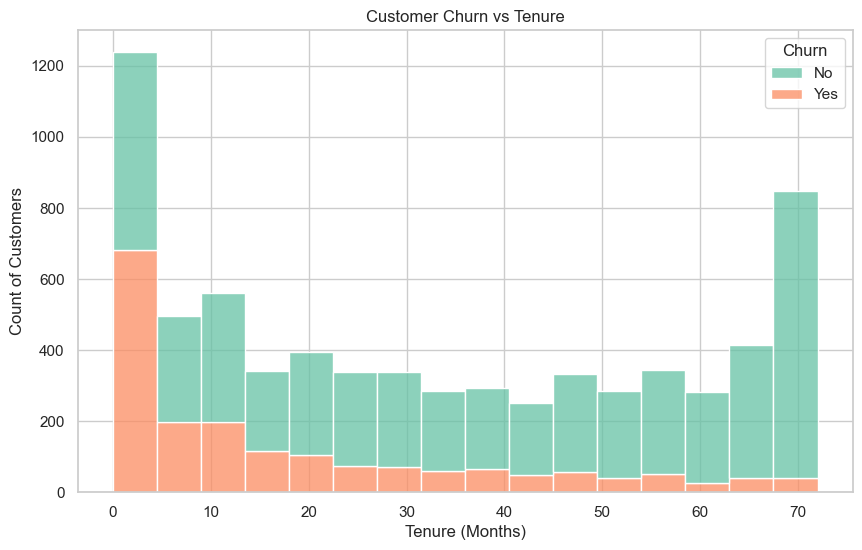

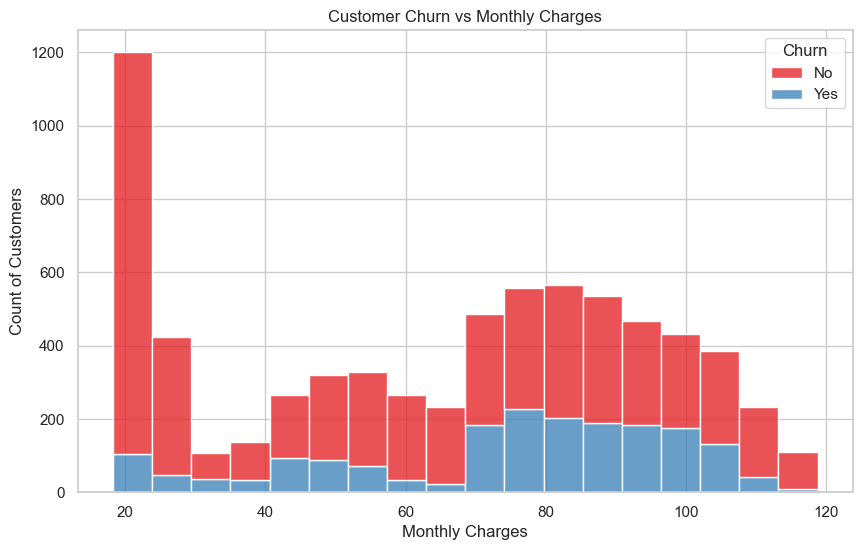

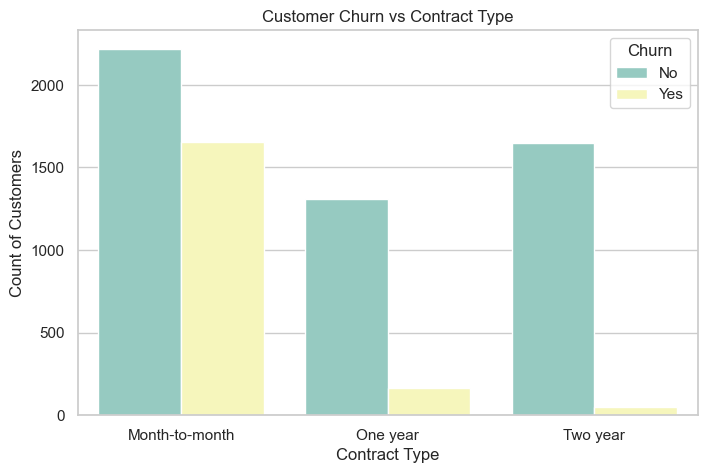

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# 1. Churn vs Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=telco_data, x='tenure', hue='Churn', multiple='stack', kde=False, palette='Set2')
plt.title('Customer Churn vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count of Customers')
plt.show()

# 2. Churn vs Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(data=telco_data, x='MonthlyCharges', hue='Churn', multiple='stack', kde=False, palette='Set1')
plt.title('Customer Churn vs Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count of Customers')
plt.show()

# 3. Churn vs Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=telco_data, x='Contract', hue='Churn', palette='Set3')
plt.title('Customer Churn vs Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count of Customers')
plt.show()


In [13]:
# split the data into training and testing models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable 'Churn'
label_encoder = LabelEncoder()
telco_data['Churn'] = label_encoder.fit_transform(telco_data['Churn'])

# Perform one-hot encoding on categorical features
telco_encoded = pd.get_dummies(telco_data.drop(columns=['customerID']), drop_first=True)

# Split the data into features (X) and target (y)
X = telco_encoded.drop('Churn', axis=1)
y = telco_encoded['Churn']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
X_train.shape, X_test.shape


((5634, 30), (1409, 30))

In [17]:
# Let's re-check for missing values in both X_train and X_test just to be sure.
missing_values_train = X_train.isnull().sum().sum()
missing_values_test = X_test.isnull().sum().sum()

missing_values_train, missing_values_test


(10, 1)

In [18]:
# Impute missing values in both training and test sets using median for numerical columns
from sklearn.impute import SimpleImputer

# Create an imputer for numerical values
imputer = SimpleImputer(strategy="median")

# Apply the imputer to both the training and test sets
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Check to ensure no more missing values
missing_values_train_imputed = X_train_imputed.isnull().sum().sum()
missing_values_test_imputed = X_test_imputed.isnull().sum().sum()

missing_values_train_imputed, missing_values_test_imputed


(0, 0)

In [19]:
# Train the Logistic Regression model on the imputed data
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = log_model.predict(X_test_imputed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8211497515968772,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.90      0.88      1036\n           1       0.69      0.60      0.64       373\n\n    accuracy                           0.82      1409\n   macro avg       0.77      0.75      0.76      1409\nweighted avg       0.82      0.82      0.82      1409\n')

In [21]:
import pandas as pd
from sklearn.metrics import classification_report

# Extract the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary into a DataFrame for better readability
report_df = pd.DataFrame(report_dict).transpose()

# Display the table
print(report_df)

# Optionally, save the DataFrame to a CSV file for further analysis
report_df.to_csv('classification_report.csv', index=True)


              precision    recall  f1-score     support
0              0.862292  0.900579  0.881020  1036.00000
1              0.685015  0.600536  0.640000   373.00000
accuracy       0.821150  0.821150  0.821150     0.82115
macro avg      0.773654  0.750558  0.760510  1409.00000
weighted avg   0.815362  0.821150  0.817215  1409.00000
